# Week4 授業課題　信用情報の学習

In [1]:
'''
ライブラリのインポート
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import roc_curve
%matplotlib inline
#pd.set_option('display.max_rows', 500)

## 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

・何を学習し、何を予測するのか<br>
・どのようなファイルを作りKaggleに提出するか<br>
・提出されたものはどういった指標値で評価されるのか

## ・何を学習し、何を予測するのか
HomeCredit社が提供する個人の電話会社や取引情報を含むデータを利用し、返済能力を予測する。

## ・どのようなファイルを作りKaggleに提出するか
ヘッダーを含んだ形式で、SK_ID_CURRの各サンプルについて、TARGET変数の確率を予測する。

## ・提出されたものはどういった指標値で評価されるのか

提出物は 、予測された確率と観測されたターゲットの間のROC曲線の下の領域で評価される。

## 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [2]:
'''
データセットファイルの読み込み
'''
df = pd.read_csv("application_train.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#カテゴリカルデータをダミー変数化
df = pd.get_dummies(df)
print(df.shape)

(307511, 246)


In [5]:
# 欠損値がある行と列を削除
df = df.dropna(how='any', axis=1)
df = df.dropna(how='any', axis=0)
print(df.shape)

(307511, 185)


In [6]:
# target0、target1のサンプルを５００ずつランダムに取り出す（ターゲット数が不均衡のため）

# target0とtarget1にデータを分割
t0 = df.query("TARGET == 0")
t1 = df.query("TARGET == 1")

# ランダムに５００サンプルを抽出、データフレームに変換
t0 = t0.sample(n=500)
t1 = t1.sample(n=500)
t0.head()
t1.head()

# t0とt１を結合,０と１が５００ずつのデータセットにする
df_1000 = pd.concat([t0, t1])

# X array,yarrayに格納
y = df_1000["TARGET"]
y = np.array(y)
X = df_1000.drop("TARGET", axis=1)

X = np.array(X)
print(X.shape)
print(y.shape)

# 訓練用データと検証用データに分割
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.75)

# print(X_train[0])
# print(y_train[0])
# print(X_test[0])
# print(y_test[0])

(1000, 184)
(1000,)


In [7]:
# SVMで学習、推定
svm = SVR(gamma='scale')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("SVM の推定値：{}".format(svm_pred[:4])) 
print("テストラベル値：{}".format(y_test[:4]))

SVM の推定値：[0.87154806 0.57095264 0.91212369 0.78137268]
テストラベル値：[1 1 0 1]


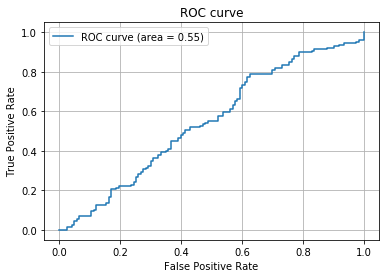

In [8]:
# 評価(ROC曲線のカーブ)

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_pred)

# ついでにAUCも
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [9]:
# テストデータを読み込む
'''
testデータセットファイルの読み込み
'''
df_test = pd.read_csv("application_test.csv")
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [11]:
#カテゴリカルデータをダミー変数化
df_test = pd.get_dummies(df_test)
print(df_test.shape)
# display(df_test.head())

# 欠損値がある行と列を削除
df_test = df_test.dropna(how='any', axis=1)
df_test = df_test.dropna(how='any', axis=0)
print(df_test.shape)

#ndarrayに変換
X_df_test = np.array(df_test)
print(X_df_test.shape)

(48744, 242)
(48744, 184)
(48744, 184)


In [12]:
# テストデータを使ってSVMで推定
svm_pred_sub = svm.predict(X_df_test)
print(svm_pred_sub.shape)
print("SVM の推定値：{}".format(svm_pred_sub))

# # 評価(ROC曲線のカーブ)
# print("ROC_curve：{}".format(roc_curve(df_test, svm_pred)))

(48744,)
SVM の推定値：[0.65572139 0.27601889 0.51589621 ... 0.59011237 0.64371903 0.64139219]


In [13]:
# kaggleに提出するためのCSVファイルに加工
svm_pred_sub = pd.DataFrame(svm_pred_sub)
svm_pred_sub = svm_pred_sub.clip(0, 0.99)
svm_pred_sub = svm_pred_sub.rename(columns={0:"TARGET"})
svm_pred_sub = pd.concat([df_test["SK_ID_CURR"], svm_pred_sub], axis=1, join='inner')
#svm_pred = svm_pred.set_index("SK_ID_CURR", inplace = True)
svm_pred_sub.head()


,SK_ID_CURR,TARGET
0,100001,0.655721
1,100005,0.276019
2,100013,0.515896
3,100028,0.172078
4,100038,0.522783


In [14]:
# CSV ファイル (svm_pred.csv) として出力
svm_pred_sub.to_csv("svm_pred_sub.csv", index=False)

#Kaggleに提出しました
#Score 0.52856

## 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

・どの特徴量を使うか<br>
・どう前処理をするか<br>
何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

### 1 フィルタ法で特徴量を５０％に絞る
### 2 標準化
### 3 外れ値に頑健な標準化(RobustScaler)
### 4 正規化
### 5 OneHotEncording

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import OneHotEncoder
import scipy.stats
from sklearn import preprocessing

#カテゴリ変数加工前のデータ
# X array,yarrayに格納
X = df_1000.drop("TARGET", axis=1)
X = np.array(X)
print(X.shape)

y = df_1000["TARGET"]
y = np.array(y)
print(y.shape)

# 訓練用データと検証用データに分割

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.75)

# 1 フィルタ法で特徴量を５０％に絞る
#SelectPercentileを使って50%の特徴量を選択。分類の場合はf_classifを用いる（回帰にはf_regressionを用いる）
select = SelectPercentile(score_func=f_regression, percentile=50)
select.fit(X_train, y_train)

#trainデータとtestデータを変換
X_train_filter = select.transform(X_train)
X_test_filter = select.transform(X_test)

print(X_train_filter.shape)
print(X_test_filter.shape)
print(y_train.shape)
print(y_test.shape)

# SVMで学習、推定
svm = SVR(gamma='scale')
svm.fit(X_train_filter, y_train)
svm_pred_filter = svm.predict(X_test_filter)

#2 標準化
ss = preprocessing.StandardScaler()
ss.fit(X)
X_ss = ss.transform(X)

# 訓練用データと検証用データに分割
X_train_ss, X_test_ss, y_train_ss, y_test_ss = \
    train_test_split(X_ss, y, train_size=0.75)

# SVMで学習、推定
svm.fit(X_train_ss, y_train_ss)
svm_pred_ss = svm.predict(X_test_ss)
#print("SVM の推定値：{}".format(svm_pred_ss[:4])) 
#print("テストラベル値：{}".format(y_test_ss[:4]))


# 3 外れ値に頑健な標準化(RobustScaler)
rs = preprocessing.RobustScaler(quantile_range=(25., 75.))
rs.fit(X)
X_rs = rs.transform(X)

# 訓練用データと検証用データに分割
X_train_rs, X_test_rs, y_train_rs, y_test_rs = \
    train_test_split(X_rs, y, train_size=0.75)

# SVMで学習、推定
svm.fit(X_train_rs, y_train_rs)
svm_pred_rs = svm.predict(X_test_rs)


# 4 正規化
mm = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
mm.fit(X)
X_mm = mm.transform(X)

# 訓練用データと検証用データに分割
X_train_mm, X_test_mm, y_train_mm, y_test_mm = \
    train_test_split(X_mm, y, train_size=0.75)

# SVMで学習、推定
svm.fit(X_train_mm, y_train_mm)
svm_pred_mm = svm.predict(X_test_mm)


# 5 OneHotEncording
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X)

# 訓練用データと検証用データに分割
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = \
    train_test_split(X_ohe, y, train_size=0.75)

# SVMで学習、推定
svm.fit(X_train_ohe, y_train_ohe)
svm_pred_ohe = svm.predict(X_test_ohe)

(1000, 184)
(1000,)
(750, 92)
(250, 92)
(750,)
(250,)


/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: Run

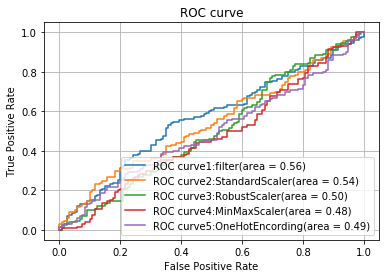

In [16]:
# 評価(ROC曲線のカーブ)

# FPR, TPR(, しきい値) を算出

pred_list = [svm_pred_filter, svm_pred_ss, svm_pred_rs, svm_pred_mm, svm_pred_ohe]
title_list = ["1:filter", "2:StandardScaler", 
              "3:RobustScaler","4:MinMaxScaler","5:OneHotEncording"]

for i in range(len(pred_list)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_list[i])

    # AUC
    auc = metrics.auc(fpr, tpr)

    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve'+ title_list[i] +'(area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

#print("SVM の推定値：{}".format(svm_pred_filter)) 
#print("テストラベル値：{}".format(y_test))

## まとめ
５つの手法で前処理や特徴量エンジニアリングを行ったが、あまり精度が上がらなかった。
最も良いのは、1番目の特徴量のフィルタリングだった。

In [33]:
# テストデータを使って１番の手法で特徴量を絞り、SVMで推定
#select.fit(X_df_test)

#trainデータとtestデータを変換
#X_train_filter = select.transform(X_train)
X_test_filter = select.transform(X_df_test)

# SVMで学習、推定
svm = SVR(gamma='scale')
svm.fit(X_train_filter, y_train)
svm_pred_filter = svm.predict(X_test_filter)

In [34]:
# kaggleに提出するためのCSVファイルに加工
svm_pred_filter = pd.DataFrame(svm_pred_filter)
svm_pred_sub = svm_pred_sub.abs()
svm_pred_filter = svm_pred_filter.rename(columns={0:"TARGET"})
svm_pred_filter = pd.concat([df_test["SK_ID_CURR"], svm_pred_filter], axis=1, join='inner')
#svm_pred = svm_pred.set_index("SK_ID_CURR", inplace = True)
svm_pred_filter.head()


,SK_ID_CURR,TARGET
0,100001,0.667529
1,100005,0.514797
2,100013,0.445005
3,100028,0.085259
4,100038,0.463747


In [35]:
# CSV ファイル (svm_pred.csv) として出力
svm_pred_filter.to_csv("svm_pred_filter.csv", index=False)

#Kaggleに提出しました